1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [1]:
from sklearn import preprocessing
import pandas as pd 
import numpy as np 

In [29]:
df = pd.read_csv("..\data\iris.csv")

In [30]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [31]:
print(set(df["variety"]))

{'Setosa', 'Virginica', 'Versicolor'}


In [32]:
le_variety = preprocessing.LabelEncoder()
variety_encoded = le_variety.fit_transform(df["variety"])

In [33]:
print(variety_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [34]:
le_variety.inverse_transform(variety_encoded)

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [35]:
y = np.array(variety_encoded)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
X = np.array(list(zip(df["sepal.length"], df["sepal.width"], df["petal.length"], df["petal.width"])))


## TRAIN, TEST = 0.2

In [37]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


### K = 3

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [39]:
predicted = model.predict([[15.7,2.8,9.5,0.1]])
print(predicted)

[2]


In [40]:
predicted2 = model.predict([[1.7,3.8,4.5,11.3]])
print(predicted2)

[2]


In [41]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2])

In [42]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


### K = 7

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=7)

model1.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [44]:
predicted = model1.predict([[15.7,2.8,9.5,0.1]])
print(predicted)
predicted2 = model1.predict([[1.7,3.8,4.5,11.3]])
print(predicted2)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[2]
[2]
Accuracy: 0.9666666666666667


### K = (1, 20)

In [45]:
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = knn.score(X_test,y_test)

scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.8666666666666667,
 5: 0.9,
 6: 0.8666666666666667,
 7: 1.0,
 8: 0.9,
 9: 0.9333333333333333,
 10: 0.9333333333333333,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 1.0,
 14: 0.9333333333333333,
 15: 0.9666666666666667,
 16: 0.9333333333333333,
 17: 0.9333333333333333,
 18: 0.8666666666666667,
 19: 0.9333333333333333}

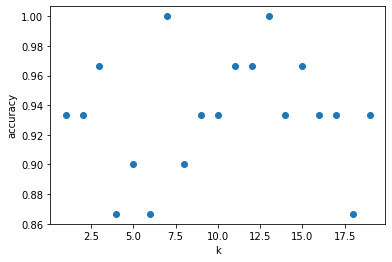

In [46]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))


### TRAIN, TEST = 0.6

In [47]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=43)
print(X_train.shape)
print(X_test.shape)

(60, 4)
(90, 4)


In [48]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [49]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2,
       0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2,
       2, 0])

In [50]:
predicted = model1.predict([[15.7,2.8,9.5,0.1]])
print(predicted)
predicted2 = model1.predict([[1.7,3.8,4.5,11.3]])
print(predicted2)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[2]
[2]
Accuracy: 0.9444444444444444


In [51]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [52]:
predicted = model1.predict([[15.7,2.8,9.5,0.1]])
print(predicted)
predicted2 = model1.predict([[1.7,3.8,4.5,11.3]])
print(predicted2)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[2]
[2]
Accuracy: 0.9444444444444444


In [53]:
# La precisión es menor porque entrena con menos información

## ELIMINAMOS LA CLASE SETOSA

In [54]:
df1 = df[df["variety"] != "Setosa"]

In [55]:
df1

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [56]:
le_variety = preprocessing.LabelEncoder()
variety_encoded = le_variety.fit_transform(df1["variety"])
print(variety_encoded)
y = np.array(variety_encoded)
print(y)
X = np.array(list(zip(df1["sepal.length"], df1["sepal.width"], df1["petal.length"], df1["petal.width"])))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
print(X_train.shape)
print(X_test.shape)

(80, 4)
(20, 4)


In [62]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [63]:
predicted = model1.predict([[15.7,2.8,9.5,0.1]])
print(predicted)
predicted2 = model1.predict([[1.7,3.8,4.5,11.3]])
print(predicted2)
y_pred = model.predict(X_test)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[2]
[2]
Accuracy: 0.85


In [ ]:
# Baja la precisión